In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt  

In [2]:
TrainSet = pd.read_csv('MoonDataTrain.csv')
TestSet = pd.read_csv('MoonDataTest.csv')
TestSet.head()

,x1,x2,y
0,1.413822,-0.902414,1
1,0.398968,0.840562,0
2,0.082914,1.001508,0
3,0.803345,0.971489,0
4,1.563305,-0.410711,1


In [3]:
def plot_decision_boundary(pred_func):

    # 设定最大最小值，附加一点点边缘填充
    x_min, x_max = TrainSet.x1.min() - .5, TrainSet.x1.max() + .5
    y_min, y_max = TrainSet.x2.min() - .5, TrainSet.x2.max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 然后画出图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(TestSet.x1, TestSet.x2, c=TestSet.y, cmap=plt.cm.Spectral)

In [4]:
# 判定结果的函数
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 前向运算
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    # 计算概率输出最大概率对应的类别
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [5]:
def calculate_loss(model, X, y):
    num_examples = len(X) # 样本数
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 向前推进，前向运算
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 计算损失
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # 也得加一下正则化项
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [6]:
# 完整的训练建模函数定义
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    '''
    参数：
    1) nn_hdim: 隐层节点个数
    2）num_passes: 梯度下降迭代次数
    3）print_loss: 设定为True的话，每1000次迭代输出一次loss的当前值
    '''
    # 随机初始化一下权重呗
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # 这是咱们最后学到的模型
    model = {}
    X = np.array(TrainSet.iloc[:,:2])
    y = TrainSet.y
    num_examples = len(X) # 样本数
    # 开始梯度下降...
    for i in range(0, num_passes):
 
        # 前向运算计算loss
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # 反向传播
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # 加上正则化项
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # 梯度下降更新参数
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # 得到的模型实际上就是这些权重
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # 如果设定print_loss了，那我们汇报一下中间状况
        if print_loss and i % 1000 == 0:
          print ("Train Loss after iteration %i: %f" %(i, 
                            calculate_loss(model, np.array(TrainSet.iloc[:,:2]), TrainSet.y)))
        if print_loss and i % 5000 == 0:
          print ("-----> Test Loss after iteration %i: %f" %(i, 
                            calculate_loss(model, np.array(TestSet.iloc[:,:2]), TestSet.y)))
    print("------> Train Stop at final Loss: %f" % (calculate_loss(model, np.array(TestSet.iloc[:,:2]), TestSet.y)))
    return model

Train Loss after iteration 0: 0.420346
-----> Test Loss after iteration 0: 0.430698
Train Loss after iteration 1000: 0.073962
Train Loss after iteration 2000: 0.073384
Train Loss after iteration 3000: 0.073548
Train Loss after iteration 4000: 0.073297
Train Loss after iteration 5000: 0.073563
-----> Test Loss after iteration 5000: 0.110378
Train Loss after iteration 6000: 0.073294
Train Loss after iteration 7000: 0.073620
Train Loss after iteration 8000: 0.073314
Train Loss after iteration 9000: 0.073736
Train Loss after iteration 10000: 0.073331
-----> Test Loss after iteration 10000: 0.108826
Train Loss after iteration 11000: 0.074016
Train Loss after iteration 12000: 0.073359
Train Loss after iteration 13000: 0.095097
Train Loss after iteration 14000: 0.073377
Train Loss after iteration 15000: 0.081186
-----> Test Loss after iteration 15000: 0.115029
Train Loss after iteration 16000: 0.073373
Train Loss after iteration 17000: 0.076502
Train Loss after iteration 18000: 0.073376
Train

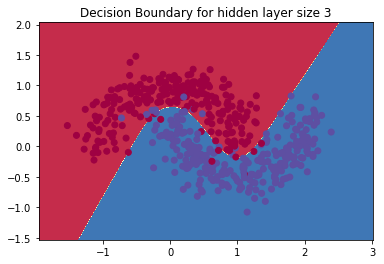

In [7]:
nn_input_dim = 2 # 输入的维度
nn_output_dim = 2 # 输出的类别个数
 
# 梯度下降参数
epsilon = 0.001 # 学习率
reg_lambda = 0.0001 # 正则化参数

# 建立隐层有3个节点(神经元)的神经网络
model = build_model(3,print_loss=True)
 
# 然后再把决策/判定边界画出来
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()